In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

18


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,fea39a952605f42eb1fafacded2c761c06eab85e,gutsy-vine,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/original.txt,cq.txt,semi/cot-original.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
1,5c32d10fbd52954c8ad351010a14273e3c2fce1b,erect-furl,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
2,81514878020b22218c57033edd34039c5d326619,sewed-limb,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,cot/format-thought.txt,cq.txt,semi/cot.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
3,667fbccdb702e97d387190d4cc16bd90f5d55da0,azoic-noma,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct
4,03504f312b9302f86e4892bb71ea0b1aa3b52f48,toxic-plop,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.5,direct/format-few.txt,cq.txt,semi/direct.json,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,direct


In [3]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "name",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [4]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,1,0.073333,0.096485,0.17,0.215264,...,65.0,273.0,25.560440,104.049678,0.0,8.00,16.0,25.00,1696.0,ccot
1,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,0.003333,0.003333,0.01,0.010000,...,0.0,299.0,0.478261,1.084684,0.0,0.00,0.0,0.00,10.0,ccot
2,0.5,ccot/format-thought.txt,cq.txt,semi/ccot.json,2,1,0.340000,0.408460,0.55,0.650810,...,98.0,182.0,43.087912,129.347461,8.0,23.25,31.0,42.00,1766.0,ccot
3,0.5,cot/format-thought.txt,cq.txt,semi/cot.json,0,1,0.246667,0.302865,0.36,0.424000,...,117.0,212.0,37.599057,25.179443,0.0,20.00,33.0,50.25,145.0,cot
4,0.5,cot/format-thought.txt,cq.txt,semi/cot.json,1,1,0.003333,0.003333,0.01,0.010000,...,0.0,299.0,1.140468,2.391330,0.0,0.00,1.0,1.00,31.0,cot


In [5]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run
0,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,0,0.5,"(1,)"
1,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,0.5,"(1,)"
2,ccot,ccot/format-thought.txt,cq.txt,semi/ccot.json,2,0.5,"(1,)"
3,cot,cot/format-thought.txt,cq.txt,semi/cot.json,0,0.5,"(1,)"
4,cot,cot/format-thought.txt,cq.txt,semi/cot.json,1,0.5,"(1,)"
5,cot,cot/format-thought.txt,cq.txt,semi/cot.json,2,0.5,"(1,)"
6,cot,cot/format-thought.txt,cq.txt,semi/cot.json,3,0.5,"(1,)"
7,cot,cot/original.txt,cq.txt,semi/cot-original.json,0,0.5,"(1,)"
8,cot,cot/original.txt,cq.txt,semi/cot-original.json,1,0.5,"(1,)"
9,cot,cot/original.txt,cq.txt,semi/cot-original.json,2,0.5,"(1,)"


In [6]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [7]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'cot/format-thought', 'cot/original',
       'cte/format-triplets-few', 'direct/format-few'], dtype=object)

In [8]:
avg_df = df.groupby(target_param_cols)[metric_cols].mean().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
0,ccot,ccot/format-thought,cq,semi/ccot,0,0.5,0.073333,0.096485,0.17,0.215264,...,36.50,65.0,273.0,25.560440,104.049678,0.0,8.00,16.0,25.00,1696.0
1,ccot,ccot/format-thought,cq,semi/ccot,1,0.5,0.003333,0.003333,0.01,0.010000,...,0.00,0.0,299.0,0.478261,1.084684,0.0,0.00,0.0,0.00,10.0
2,ccot,ccot/format-thought,cq,semi/ccot,2,0.5,0.340000,0.408460,0.55,0.650810,...,41.00,98.0,182.0,43.087912,129.347461,8.0,23.25,31.0,42.00,1766.0
3,cot,cot/format-thought,cq,semi/cot,0,0.5,0.246667,0.302865,0.36,0.424000,...,51.25,117.0,212.0,37.599057,25.179443,0.0,20.00,33.0,50.25,145.0
4,cot,cot/format-thought,cq,semi/cot,1,0.5,0.003333,0.003333,0.01,0.010000,...,0.00,0.0,299.0,1.140468,2.391330,0.0,0.00,1.0,1.00,31.0


In [9]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.75%,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max
13,cte,cte/format-triplets-few,cq,semi/cte,3,0.5,0.69,0.773824,0.78,0.851551,...,50.25,90.0,72.0,49.597222,14.136816,26.0,40.00,47.0,58.00,89.0
10,cot,cot/original,cq,semi/cot-original,3,0.5,0.65,0.748026,0.74,0.831075,...,64.25,118.0,76.0,65.907895,26.965251,14.0,48.75,64.5,76.25,164.0
16,direct,direct/format-few,cq,semi/direct,2,0.5,0.60,0.696836,0.72,0.837064,...,6.00,19.0,94.0,10.340426,13.112051,3.0,4.00,5.0,9.00,77.0
2,ccot,ccot/format-thought,cq,semi/ccot,2,0.5,0.34,0.408460,0.55,0.650810,...,41.00,98.0,182.0,43.087912,129.347461,8.0,23.25,31.0,42.00,1766.0


## Visualizations

In [10]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [11]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [12]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
0,ccot,ccot/format-thought,cq,semi/ccot,0,0.5,1,0.073333,0.096485,ccot/format-thought | cq | 0
1,ccot,ccot/format-thought,cq,semi/ccot,1,0.5,1,0.003333,0.003333,ccot/format-thought | cq | 1
2,ccot,ccot/format-thought,cq,semi/ccot,2,0.5,1,0.340000,0.408460,ccot/format-thought | cq | 2
3,cot,cot/format-thought,cq,semi/cot,0,0.5,1,0.246667,0.302865,cot/format-thought | cq | 0
4,cot,cot/format-thought,cq,semi/cot,1,0.5,1,0.003333,0.003333,cot/format-thought | cq | 1
5,cot,cot/format-thought,cq,semi/cot,2,0.5,1,0.346667,0.400345,cot/format-thought | cq | 2
6,cot,cot/format-thought,cq,semi/cot,3,0.5,1,0.036667,0.046333,cot/format-thought | cq | 3
7,cot,cot/original,cq,semi/cot-original,0,0.5,1,0.596667,0.701876,cot/original | cq | 0
8,cot,cot/original,cq,semi/cot-original,1,0.5,1,0.006667,0.006667,cot/original | cq | 1
9,cot,cot/original,cq,semi/cot-original,2,0.5,1,0.186667,0.240413,cot/original | cq | 2


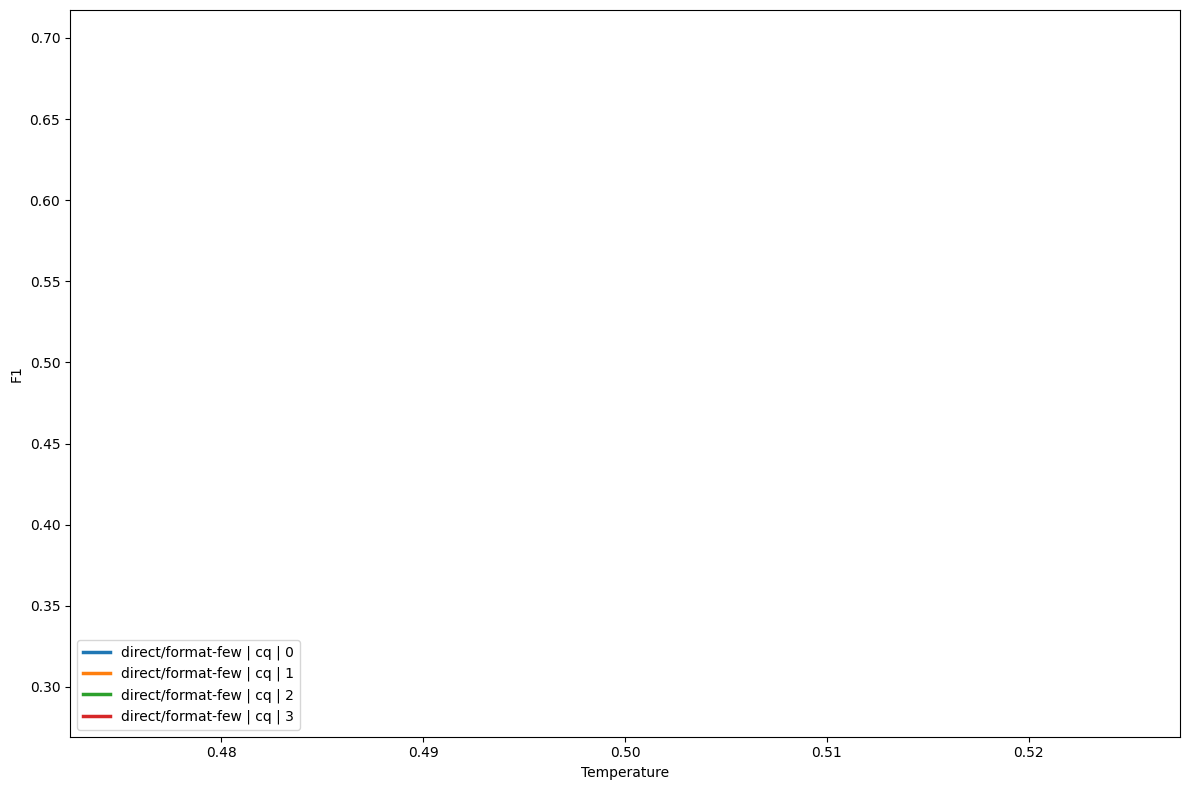

In [13]:
plot_variance(prepared_df, technique='direct', legend='brief')

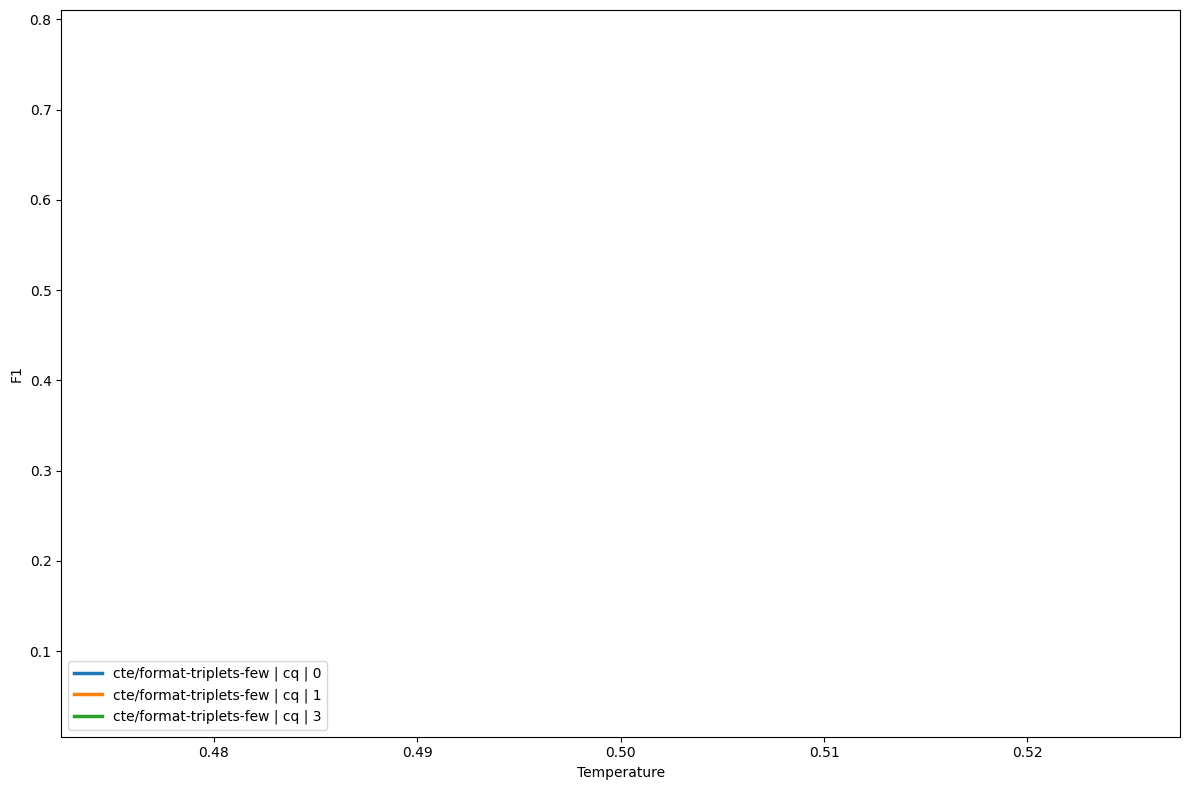

In [ ]:
plot_variance(prepared_df, technique='cte', legend='brief')

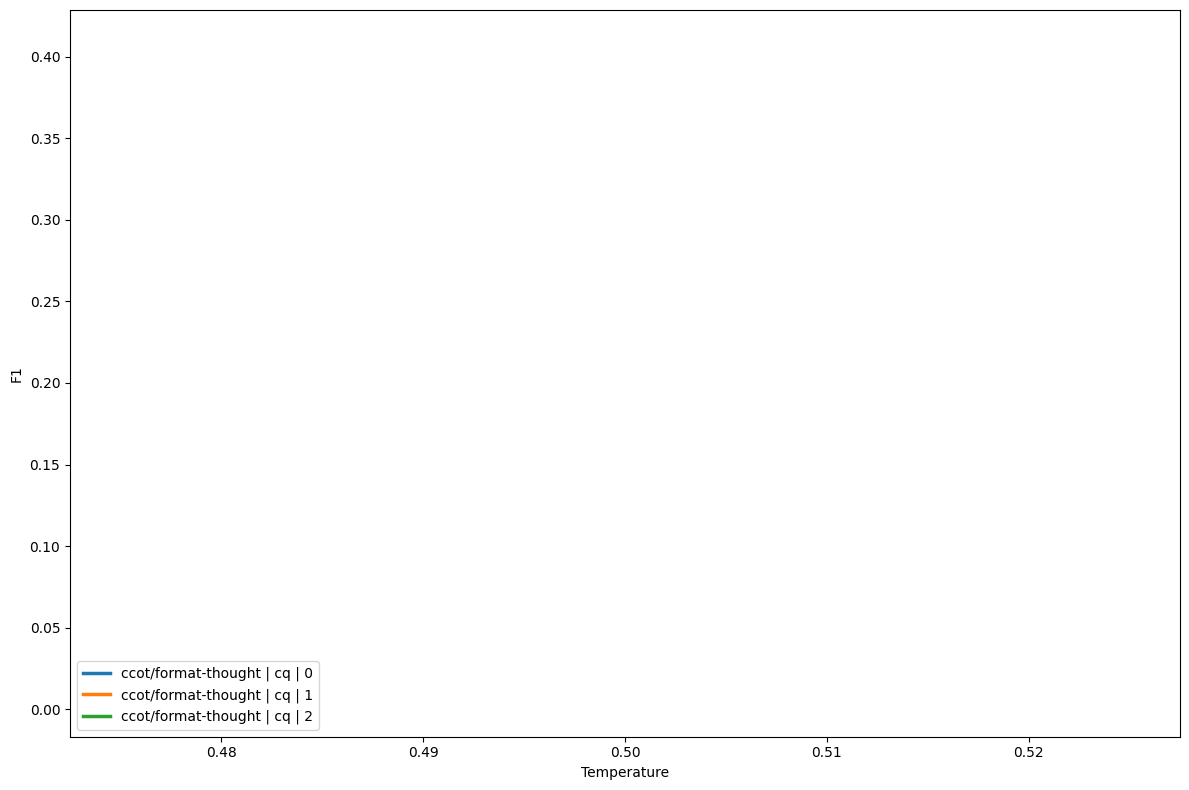

In [15]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [16]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
2,ccot,ccot/format-thought,cq,semi/ccot,2,0.5,1,0.34,0.408460,ccot/format-thought | cq | 2
10,cot,cot/original,cq,semi/cot-original,3,0.5,1,0.65,0.748026,cot/original | cq | 3
13,cte,cte/format-triplets-few,cq,semi/cte,3,0.5,1,0.69,0.773824,cte/format-triplets-few | cq | 3
16,direct,direct/format-few,cq,semi/direct,2,0.5,1,0.60,0.696836,direct/format-few | cq | 2


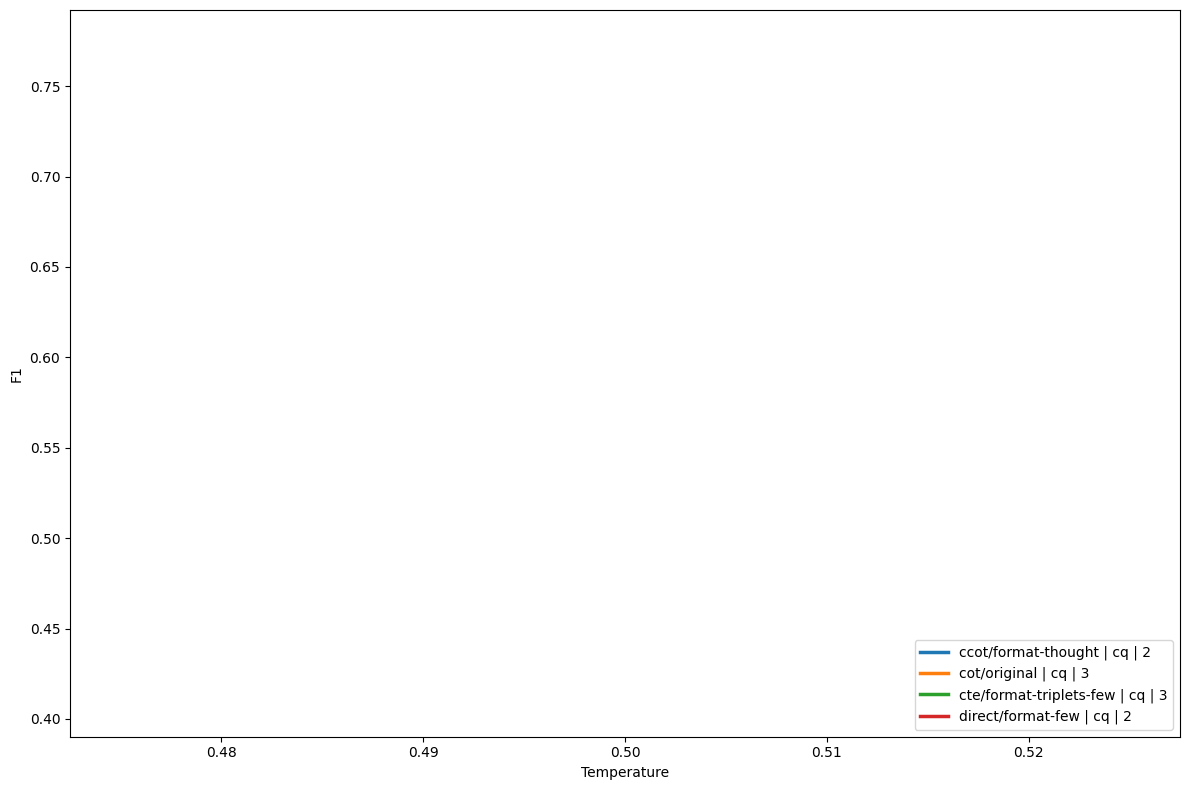

In [17]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

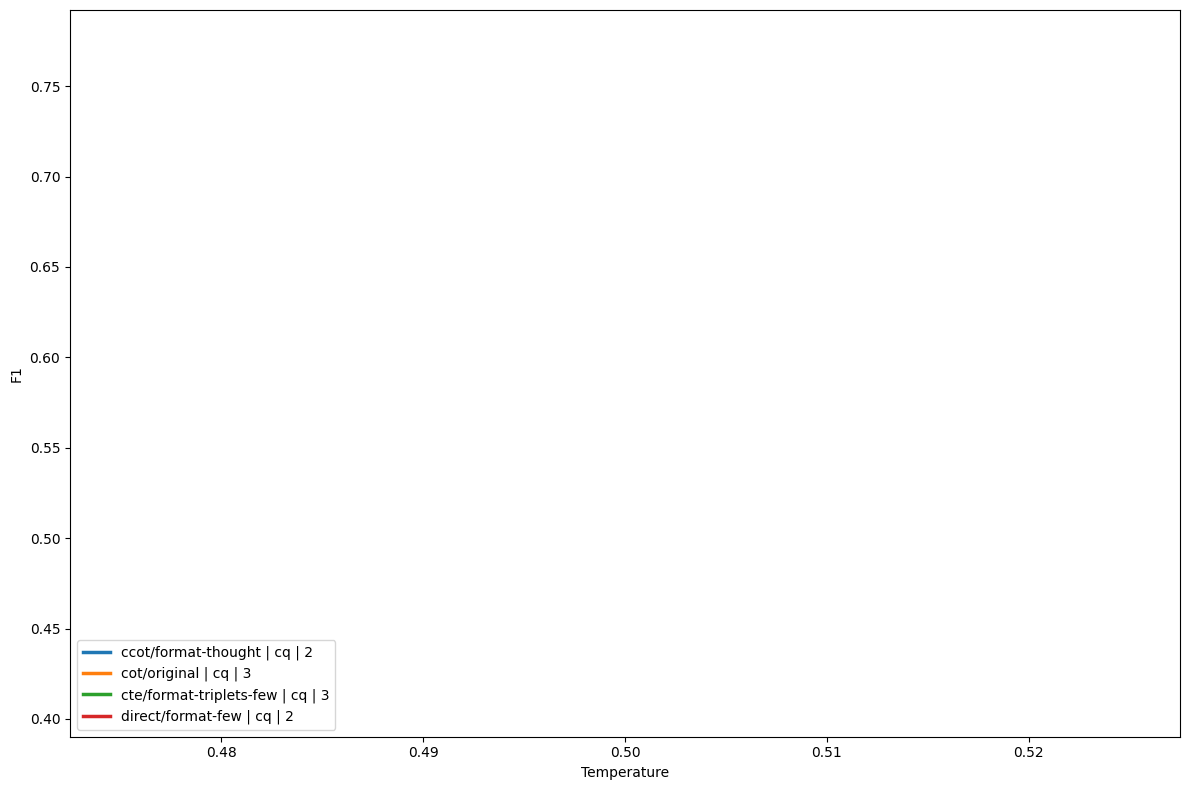

In [18]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

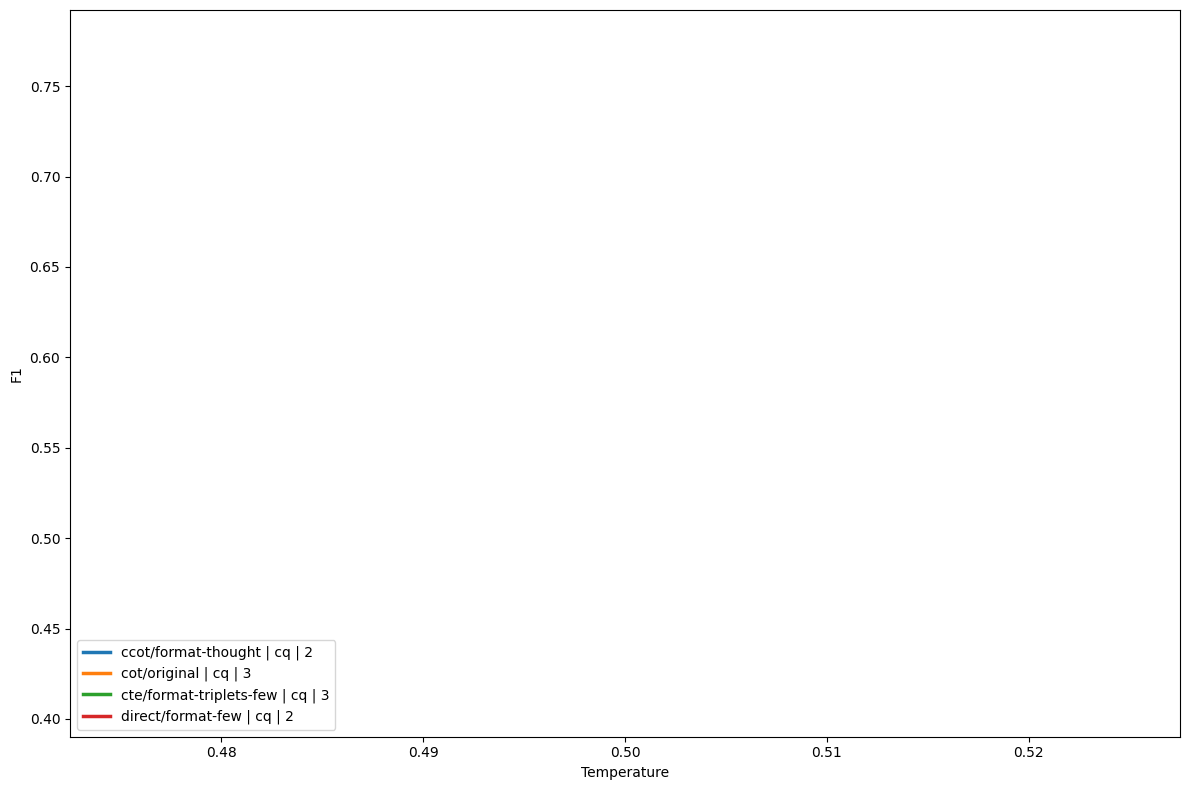

In [19]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

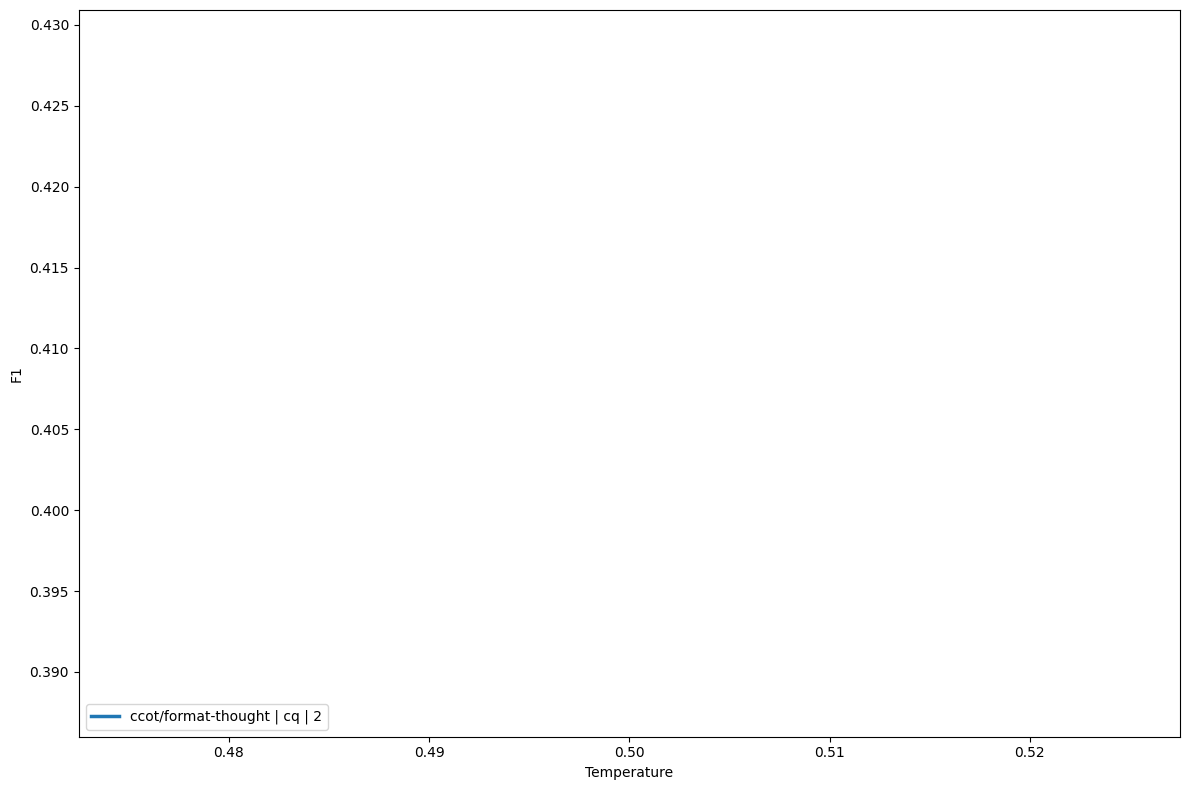

In [20]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

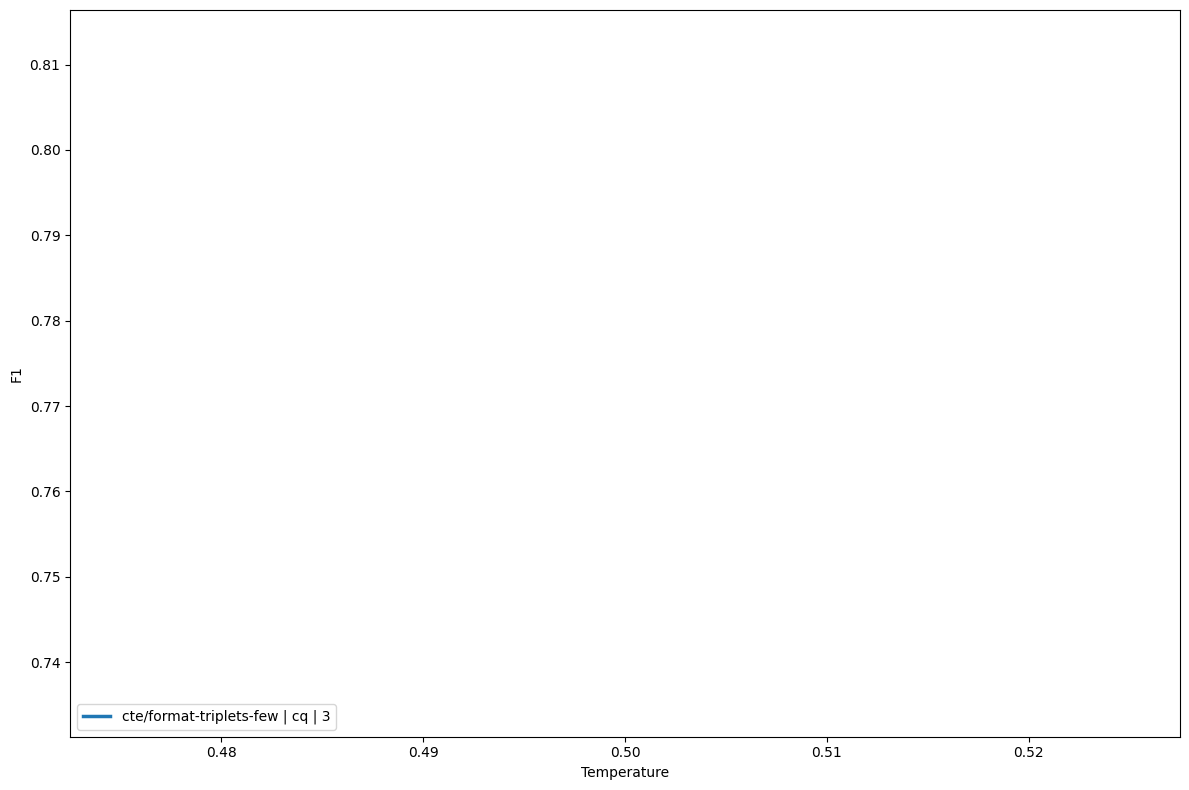

In [21]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [22]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

/tmp/ipykernel_899746/1818533546.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=legend_loc)


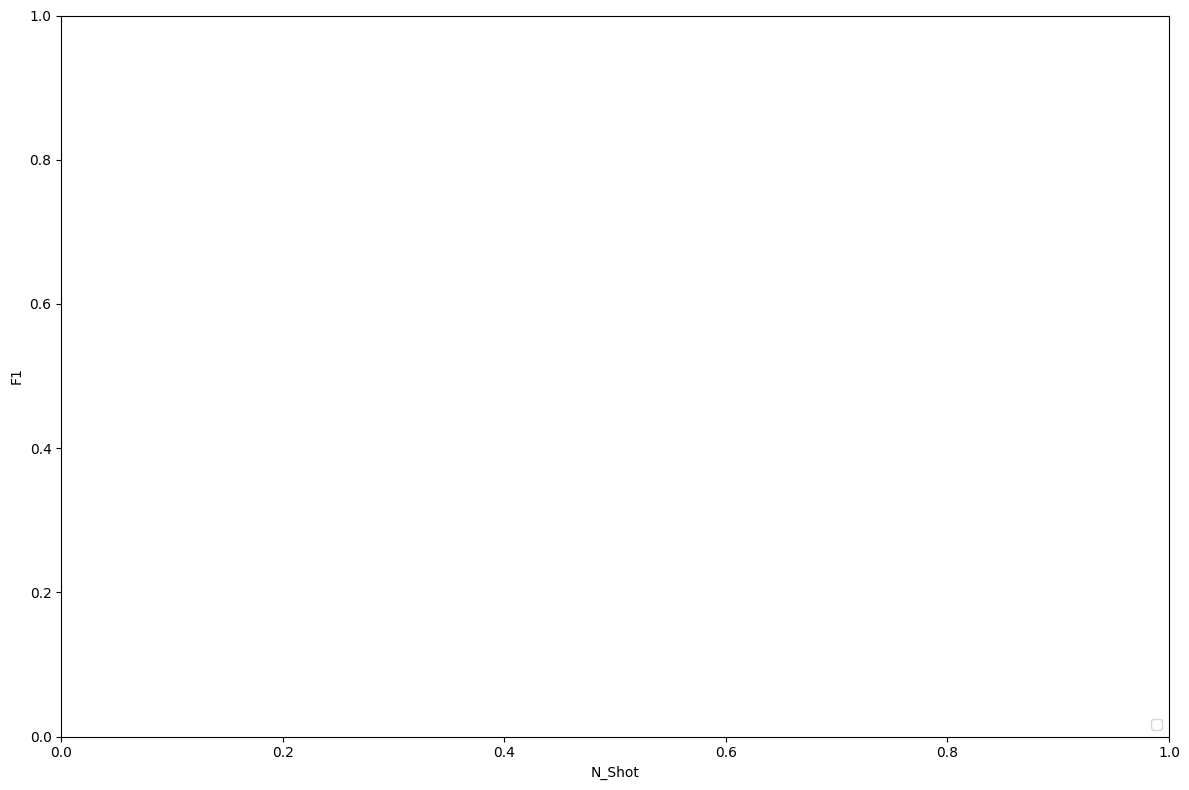

In [23]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

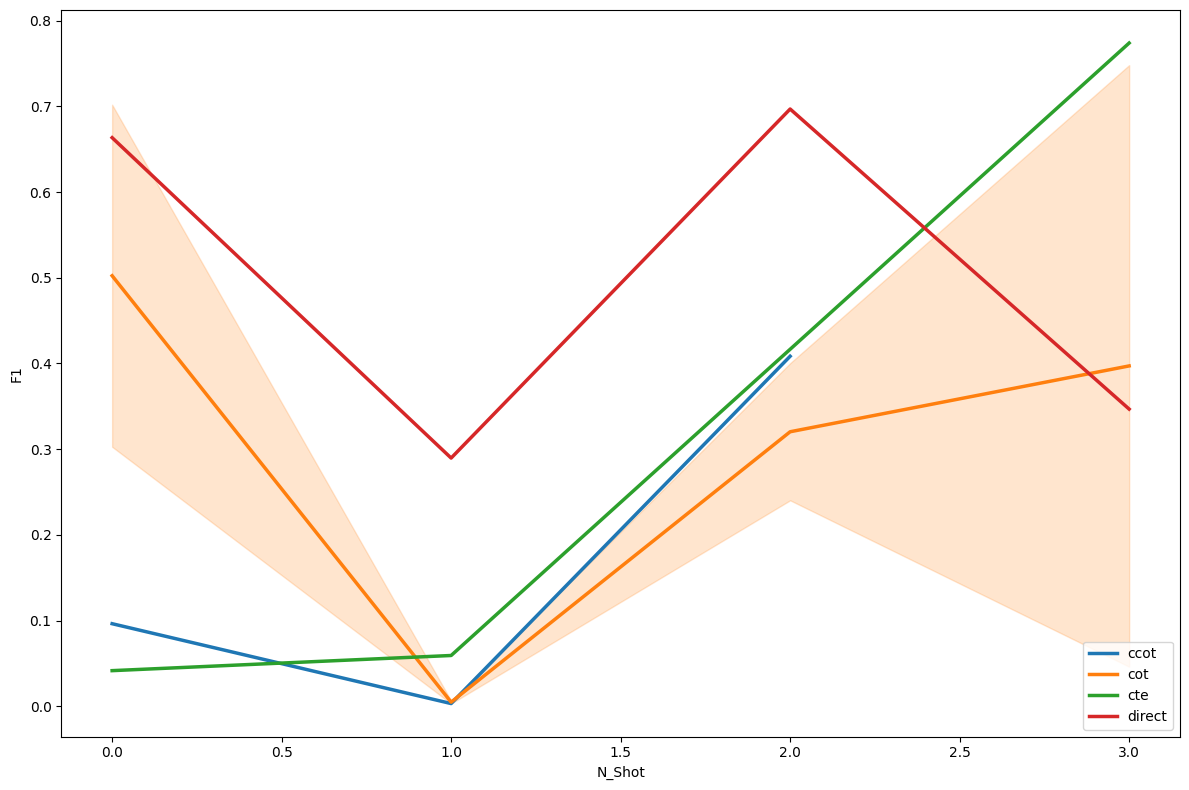

In [24]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [25]:
df

,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,...,metrics.gen_token_count.success.max,metrics.gen_token_count.fail.count,metrics.gen_token_count.fail.mean,metrics.gen_token_count.fail.std,metrics.gen_token_count.fail.min,metrics.gen_token_count.fail.25%,metrics.gen_token_count.fail.50%,metrics.gen_token_count.fail.75%,metrics.gen_token_count.fail.max,params.qa.technique
0,0.5,ccot/format-thought,cq,semi/ccot,0,1,0.073333,0.096485,0.17,0.215264,...,65.0,273.0,25.560440,104.049678,0.0,8.00,16.0,25.00,1696.0,ccot
1,0.5,ccot/format-thought,cq,semi/ccot,1,1,0.003333,0.003333,0.01,0.010000,...,0.0,299.0,0.478261,1.084684,0.0,0.00,0.0,0.00,10.0,ccot
2,0.5,ccot/format-thought,cq,semi/ccot,2,1,0.340000,0.408460,0.55,0.650810,...,98.0,182.0,43.087912,129.347461,8.0,23.25,31.0,42.00,1766.0,ccot
3,0.5,cot/format-thought,cq,semi/cot,0,1,0.246667,0.302865,0.36,0.424000,...,117.0,212.0,37.599057,25.179443,0.0,20.00,33.0,50.25,145.0,cot
4,0.5,cot/format-thought,cq,semi/cot,1,1,0.003333,0.003333,0.01,0.010000,...,0.0,299.0,1.140468,2.391330,0.0,0.00,1.0,1.00,31.0,cot
5,0.5,cot/format-thought,cq,semi/cot,2,1,0.346667,0.400345,0.55,0.624321,...,148.0,182.0,50.813187,28.123607,1.0,33.00,46.0,64.00,162.0,cot
6,0.5,cot/format-thought,cq,semi/cot,3,1,0.036667,0.046333,0.01,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
7,0.5,cot/original,cq,semi/cot-original,0,1,0.596667,0.701876,0.62,0.750232,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cot
8,0.5,cot/original,cq,semi/cot-original,1,1,0.006667,0.006667,0.01,0.010000,...,34.0,298.0,7.171141,15.015623,0.0,2.00,4.0,8.00,190.0,cot
9,0.5,cot/original,cq,semi/cot-original,2,1,0.186667,0.240413,0.32,0.399238,...,302.0,233.0,52.665236,29.829392,1.0,30.00,49.0,68.00,178.0,cot
